<a href="https://colab.research.google.com/github/pablillo77/nlp_and_deep_learning/blob/main/DS_NLP_DeepLearning_Final_Pablo_Gim%C3%A9nez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

## Presentation ##
The present project is based on a Kaggle dataset about BBC articles. The objective is to train and produce an algorithm for accurate news classification into five categories, that could yield commericial applications, customizing user engagement and giving insights for targeted audiences.

## Audience ##

This includes both readers seeking relevant content and businesses interested in market research, who could use categorized news for industry insights.

## Comercial Context ##

Personalized content delivery could improve user satisfaction and time spent on the platform. The classified data could also be valuable to marketing advertisers for audience targeting.

## Key Hypotheses and Questions ##

- Effective categorization and personalized news recommendations enhance reader engagement and retention.
- How the categories are distributed?
- Can we predict categories in new content?

## Objectives ##

- Produce an accurate classification model using LSTM and or RNN.
- Acquire category-based insights.
- Set the bases for future work on trending category predictions.





<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Preliminary data cleaning 🧹</b></div>

 </b></div>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳Libraries imports and data upload⏳
 </b></div>

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import string
import random


from collections import Counter
from wordcloud import WordCloud

# Sklearn mainly for model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# NLTK for text processing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tensorflow for creating and LSTM model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [5]:
#dataset load from github

#https://www.kaggle.com/code/dnkumars/lstm-model-bbc-articles-dataset/notebook?select=bbc_text_cls.csv
url = 'https://raw.githubusercontent.com/pablillo77/nlp_and_deep_learning/refs/heads/main/bbc_text_cls.csv'
df = pd.read_csv(url)
df.shape

(2225, 2)

In [6]:
#Some quick checks

pd.set_option('display.max_colwidth',None)
print("Data shape: ",df.shape)
print("Data types: ",df.dtypes)
df.sample(2)

Data shape:  (2225, 2)
Data types:  text      object
labels    object
dtype: object


,text,labels
575,"US box office set for record high\n\nTicket sales at the US box office are predicted to break records this year, with figures expected to reach $9.4 billion, beating 2002's all-time high.\n\nOverall figures could be dampened by the lack of a Christmas hit like last year's Oscar-winning Lord of the Rings. Traditionally, ticket sales during the festive season account for 20% of the annual total. Although admissions have actually fallen this year, the predicted high is down to increasing ticket prices. According to Exhibitor Relations President Paul Dergarabedian, the average cost of a cinema ticket could be as high as $6.25 in 2004, compared to $5.80 in 2002. This year some of the biggest hits such as The Passion of the Christ and Fahrenheit 9/11 came from outside the major studios which are usually responsible for the key blockbusters.\n\n""Many of the films that did well (with audiences) are not necessarily the films that made a lot of money,"" said Mr Dergarabedian. He added that surprise hits had come from some of the more art-house offerings such as Napoleon Dynamite and critical hit Sideways. Sony Pictures, responsible for hits like Spiderman 2 and The Grudge, are expected to top domestic market share for the second time in three years, with $1 billion-plus in sales for the third consecutive year. Sony Pictures Entertainment vice chairman. Jeff Blake said: ""We had a really diverse slate this year, and... certainly we pulled off one of the surprises with Grudge."" Horror movie The Grudge cost Sony $10 million to make but brought in $110 million. It's the latest in a recent trend for Hollywood studios to back the upper and lower ends of the market, whilst ignoring the middle. Warner Inc are likely to end the year in second place on market share with around $1.25 billion, with Disney at number three.",entertainment
139,"Ore costs hit global steel firms\n\nShares in steel firms have dropped worldwide amid concerns that higher iron ore costs will hit profit growth.\n\nShares in Germany's ThyssenKrupp, the UK's Corus and France's Arcleor fell while Japan's Nippon Steel slid after it agreed to pay 72% more for iron ore. China's Baoshan Iron and Steel Co. said it was delaying a share sale because of weak market conditions, adding it would raise steel prices to offset ore costs. The threat of higher raw material costs also hit industries such as carmakers. France's Peugeot warned that its profits may decline this year as a result of the higher steel, plastic and commodity prices.\n\nSteelmakers have been enjoying record profits as demand for steel has risen, driven by the booming economies of countries such as China and India. Steel prices rose by 8% globally in January alone and by 24% in China.\n\nThe boom times are far from over, but analysts say that earnings growth may slow. The share price fall was initially triggered by news that two of the world's biggest iron ore suppliers had negotiated contracts at much-higher prices. Miners Rio Tinto and Cia. Vale Do Rio Dolce (CVRD) this week managed to boost by 72% the price of their iron ore, a key component of steel. Analysts had expected Japan's Nippon to agree to a price rise of between 40% and 50%. Steel analyst Peter Fish, director of Sheffield-based consulting group MEPS, said the extent of CVRD's price rise was ""uncharted territory"", adding that the steel industry ""hasn't seen an increase of this magnitude probably in 50 years"". Analysts now expect other iron ore producers, such as Australia's BHP Billiton, to seek annual price rises of up to 70%.\n\nThe news triggered the share price weakness. ""It sparked worries that steel makers might not be able to increase product prices further [ to cover rising ore costs]"" explained Kazuhiro Takahashi of Daiwa Securities SMBC. In Europe, Arcelor shed 2.1% to 17.58 euros in Paris, with ThyssenKrupp dropping 1.7% to 16.87 euros. In London, Corus fell 2.2% to 55.57 pence. Japan's biggest steel company Nippon Steel 

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* We can appreciate the dataset has 2 columns, text and labels, consiting of 2225 entries. The data types are objects, "text" will be converted to string for further processing, and the labels will be encoded.
* In the random sample we see numbers, speciall chars such as new line characters that do not add value to the categorization, stop words and capital letters.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Data preliminary cleanup 🧹</b></div>

In [11]:
df['text'] = df['text'].astype(str)	 # Convert to string before regex
df['text'] = df['text'].str.lower() # Conversion to lowercase

df['text'] = (
    df['text']
    .str.replace(r'\d+', '', regex=True)           # Remove digits
    .str.replace(r'[^\w\s]', '', regex=True)        # Remove special characters except for word chars and whitespace
    .str.replace(r'\n', ' ', regex=True)            # Replace newlines with space
    .str.replace(r'\\', '', regex=True)             # Remove any remaining backslashes
    .str.replace(r'"', '', regex=True)              # Remove double quotes
    .str.strip()                                    # Trim leading/trailing whitespace
)




<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🔎 Exploratory Data Analysis (EDA).🔎</b></div>

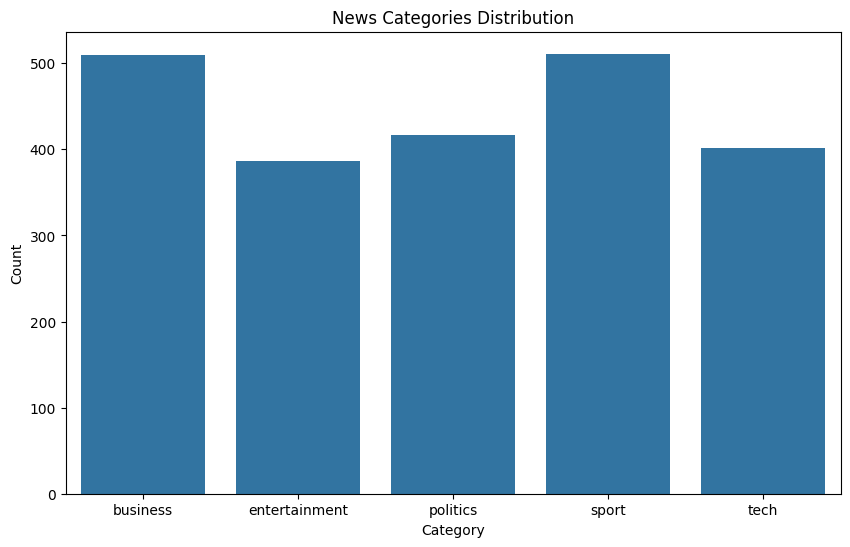

In [12]:
# Check categories distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df)
plt.title(f'News Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


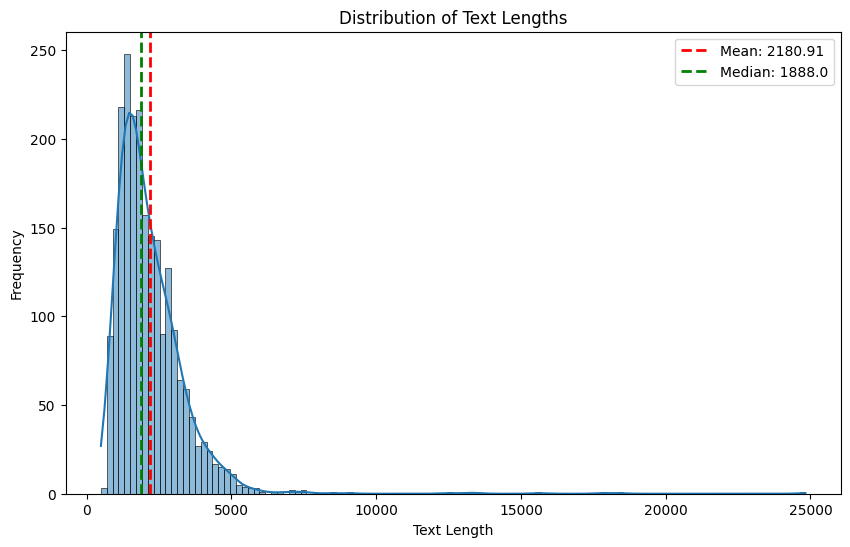

In [14]:
# Checking Text lenghts

df['text_length'] = df['text'].apply(len) # create a new column

mean_length = df['text_length'].mean()
median_length = df['text_length'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.legend()
plt.show()

In [18]:
# Find the longest text element and its length

longest_text = df['text'].iloc[df['text'].str.len().idxmax()]
longest_text_length = len(longest_text)

print(f"Longest text element:\n{longest_text}\n")
print(f"Character count: {longest_text_length}")

Longest text element:
terror powers expose tyranny  the lord chancellor has defended government plans to introduce control orders to keep foreign and british terrorist suspects under house arrest where there isnt enough evidence to put them on trial  lord falconer insists that the proposals do not equate to a police state and strike a balance between protecting the public against the threat of terrorism and upholding civil liberties but thriller writer frederick forsyth tells bbc news of his personal response to the move    there is a mortal danger aimed at the heart of britain or so says home secretary charles clarke my reaction so what it is not that i am cynical or just do not care i care about this country very much  but in the  years that i have been alive there has not been one hour of one day of one month of one year when there has not been a threat aimed at us my point is the british have always coped without becoming a dictatorship we have coped with fear without becoming a st

In [24]:
# Stopwords removal

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


df['text']=df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


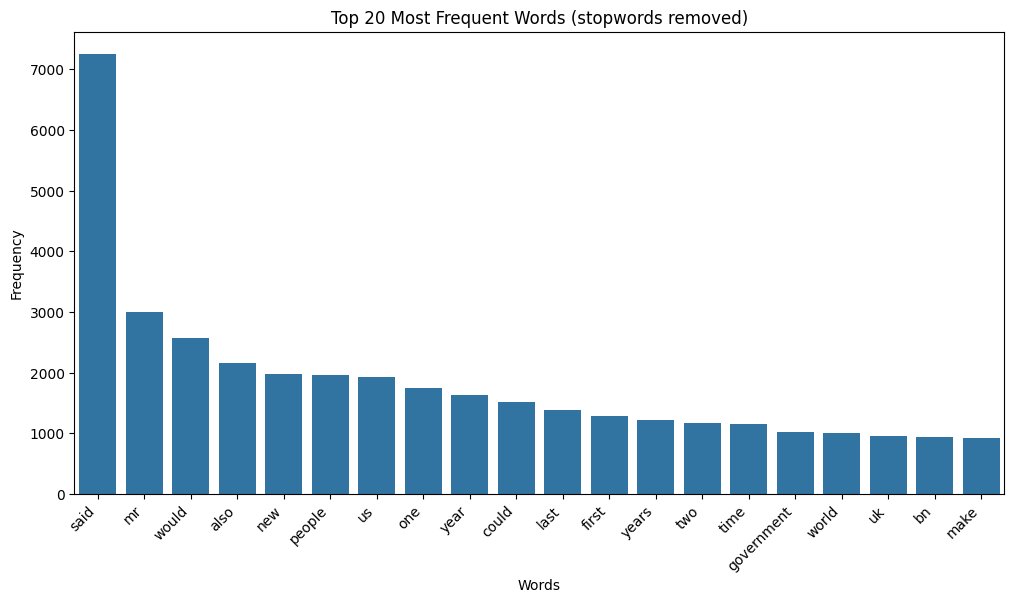

In [26]:
# Counting most frequent words

from collections import Counter

# Assuming 'df' and 'text' column exist as in the provided code
word_counts = Counter(" ".join(df['text']).split())
top_20_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_words)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words (stopwords removed)')
plt.show()

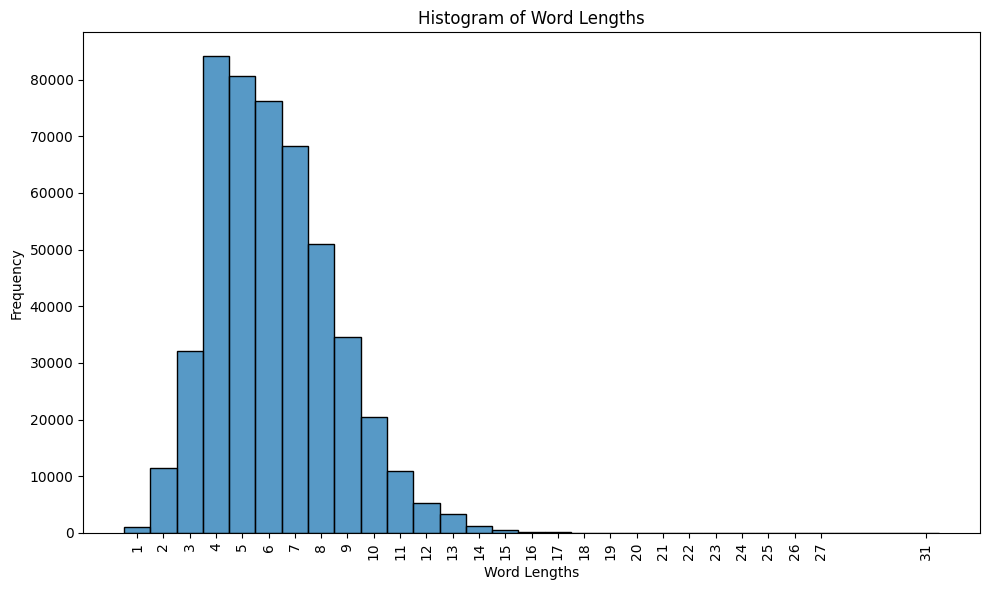

In [40]:
def word_length_histogram(df):
    word_lengths = []
    for text in df['text']:
        words = text.split()
        for word in words:
          word_lengths.append(len(word))

    unique_word_lengths = sorted(list(set(word_lengths)))

    plt.figure(figsize=(10, 6))
    sns.histplot(word_lengths, discrete=True)
    plt.xticks(unique_word_lengths, rotation=90)
    plt.xlabel('Word Lengths')
    plt.ylabel('Frequency')
    plt.title('Histogram of Word Lengths')
    plt.tight_layout()
    plt.show()

word_length_histogram(df)

In [34]:
# N-grams analysis

from nltk import ngrams


def analyze_ngrams(df, column_name, n=2):
    all_ngrams = []
    for text in df[column_name]:
        # Tokenize the text
        tokens = nltk.word_tokenize(str(text).lower())  # Convert to lowercase

        # Generate n-grams
        text_ngrams = list(ngrams(tokens, n))

        # Extend the list of all n-grams
        all_ngrams.extend(text_ngrams)

    # Count the frequency of each n-gram
    ngram_counts = Counter(all_ngrams)

    # Print or return the most frequent n-grams
    print(f"Top 10 most frequent {n}-grams:\n")
    for ngram, count in ngram_counts.most_common(10):
        print(f"{ngram}: {count}")


analyze_ngrams(df, 'text', n=2)  # Analyze bigrams
print("\n")
analyze_ngrams(df, 'text', n=3)  # Analyze trigrams
print("\n")
analyze_ngrams(df, 'text', n=4)  # Analyze 4grams

Top 10 most frequent 2-grams:

('last', 'year'): 384
('said', 'mr'): 359
('told', 'bbc'): 348
('mr', 'blair'): 296
('prime', 'minister'): 274
('mr', 'brown'): 214
('chief', 'executive'): 198
('said', 'would'): 192
('bbc', 'news'): 178
('general', 'election'): 172


Top 10 most frequent 3-grams:

('told', 'bbc', 'news'): 147
('bbc', 'news', 'website'): 94
('told', 'bbc', 'radio'): 76
('leader', 'michael', 'howard'): 55
('mr', 'blair', 'said'): 54
('million', 'dollar', 'baby'): 50
('radio', 'today', 'programme'): 49
('told', 'bbc', 'sport'): 48
('bbc', 'radio', 'today'): 47
('tory', 'leader', 'michael'): 41


Top 10 most frequent 4-grams:

('told', 'bbc', 'news', 'website'): 77
('bbc', 'radio', 'today', 'programme'): 44
('told', 'bbc', 'radio', 'today'): 39
('tory', 'leader', 'michael', 'howard'): 38
('prime', 'minister', 'tony', 'blair'): 26
('foreign', 'secretary', 'jack', 'straw'): 22
('home', 'secretary', 'charles', 'clarke'): 21
('bbc', 'radio', 'five', 'live'): 18
('shadow', 'chanc

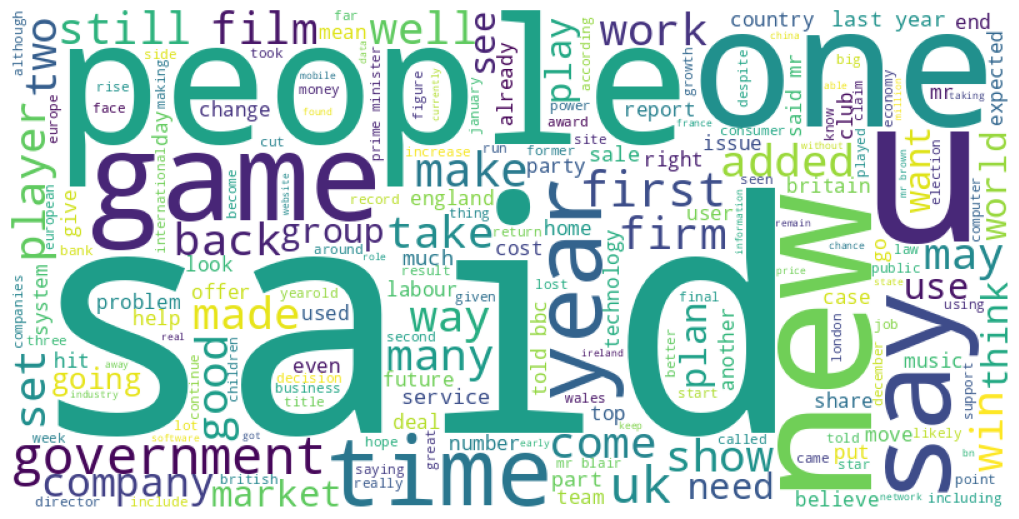

In [41]:
# Create the word cloud

text = " ".join(text for text in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* The categories (labels) have a good classes balance in the dataset.
* Text lenght analysis, shows a distribution with a mean value of 218 characters, the longest text has 24829.
* Most frequent words are "said" and "mr", "would", consisten with the reporting tone and style of a news channel.
* The word lenghts analysis, indicates that having removed the stopwords (usually words of 2 or 3 letters if language is English) the next most frequent lengths are 4 and 5 letters long. Again there is agreement with the language used.
* N-Grams study shows context also in agreemnent with the reporting style of a news channel. "last year", "told BBC news" and "told BBC nwes website" are the most frequent for bigrams, trigrams and four-grams.

# Model

In [50]:
# Prepare text data and labels
X = df['text'].values
y = df['labels'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

# Tokenization and padding
max_words = 10000  # Number of unique words to use
max_length = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
# Training the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.2981 - loss: 1.5370 - val_accuracy: 0.8006 - val_loss: 0.9500
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 390ms/step - accuracy: 0.7550 - loss: 0.7463 - val_accuracy: 0.7528 - val_loss: 0.6558
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 347ms/step - accuracy: 0.8857 - loss: 0.4075 - val_accuracy: 0.8904 - val_loss: 0.3998
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 349ms/step - accuracy: 0.9715 - loss: 0.1366 - val_accuracy: 0.9017 - val_loss: 0.3526
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.9943 - loss: 0.0586 - val_accuracy: 0.9073 - val_loss: 0.3327


In [52]:
# Predicting on test data
y_test_predictions = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_predictions, axis=1)

# Calculate metrics for test data
accuracy = accuracy_score(y_test, y_test_pred_classes)
precision = precision_score(y_test, y_test_pred_classes, average='macro')
recall = recall_score(y_test, y_test_pred_classes, average='macro')
f1 = f1_score(y_test, y_test_pred_classes, average='macro')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step


In [53]:
# Display results
results = pd.DataFrame({
    'model': ['LSTM'],
    'precision': [precision],
    'recall': [recall],
    'F1': [f1],
    'accuracy': [accuracy]
})
print("Test Results:")
print(results)

Test Results:
  model  precision    recall        F1  accuracy
0  LSTM   0.894625  0.889301  0.891209  0.896629


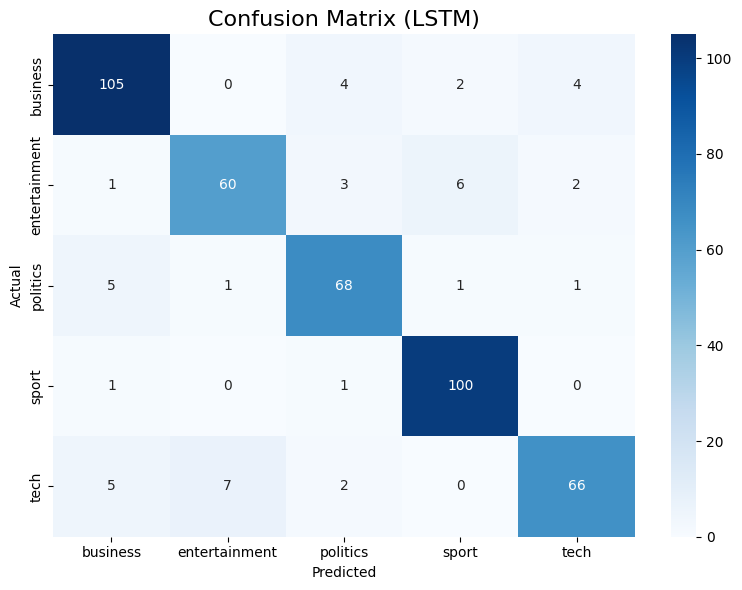

In [54]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_classes)
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix (LSTM)', fontsize=16)
ax.xaxis.set_ticklabels(label_encoder.classes_, fontsize=10)
ax.yaxis.set_ticklabels(label_encoder.classes_, fontsize=10)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [57]:
# prompt: test the model randomly selecting 3 values, sow the prediction and the actual value

# Select 3 random indices from the test data
random_indices = random.sample(range(len(X_test)), 5)

# Loop through the selected indices
for index in random_indices:
    # Get the text and true label
    text = X_test.iloc[index]
    true_label = y_test[index]

    # Preprocess the text for prediction
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length)

    # Predict the category
    prediction = model.predict(text_padded)
    predicted_label = np.argmax(prediction)

    # Decode the predicted label
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]
    true_category = label_encoder.inverse_transform([true_label])[0]

    # Print the results
    print(f"Text: {text[:100]}...")  # Print the first 100 characters of the text
    print(f"Predicted Category: {predicted_category}")
    print(f"Actual Category: {true_category}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Text: big war games battle arrival new titles popular medal honor call duty franchises leaves fans wartime...
Predicted Category: tech
Actual Category: tech
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Text: fileswappers ready new network legal attacks websites help people swap pirated films forced developm...
Predicted Category: tech
Actual Category: tech
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Text: howl helps boost japans cinemas japans box office received boost last year ticket sales worth bn yen...
Predicted Category: entertainment
Actual Category: entertainment
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Text: nuclear dumpsite plan attacked plans allow foreign nuclear waste permanently stored uk branded deepl...
Predicted Category: politics
Actual Category: politics
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Text: german music zombie state german music business third largest worl

In [67]:
# prompt: create an input box for entering text as a testing input for this model, show the predicted category.

#@title Enter text for category prediction
text_input = "soccer game" #@param {type:"string"}

# Preprocess the text input
text_sequence = tokenizer.texts_to_sequences([text_input])
text_padded = pad_sequences(text_sequence, maxlen=max_length)

# Predict the category
prediction = model.predict(text_padded)
predicted_label = np.argmax(prediction)

# Decode the predicted label
predicted_category = label_encoder.inverse_transform([predicted_label])[0]

# Print the predicted category
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Category: tech


In [69]:
# prompt: test 5 randomly selected texts from sport category only and test the predictions

# Select 5 random indices from the test data belonging to the 'sport' category
sport_indices = df[df['labels'] == 'sport'].index.tolist()
random_sport_indices = random.sample(sport_indices, 5)

# Loop through the selected indices
for index in random_sport_indices:
    # Get the text and true label
    text = df['text'].iloc[index]
    true_label = df['labels'].iloc[index]

    # Preprocess the text for prediction
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length)

    # Predict the category
    prediction = model.predict(text_padded)
    predicted_label = np.argmax(prediction)

    # Decode the predicted label
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]

    # Print the results
    print(f"Text: {text[:100]}...")  # Print the first 100 characters of the text
    print(f"Predicted Category: {predicted_category}")
    print(f"Actual Category: {true_label}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Text: saintandre anger absent stars sale sharks director rugby philippe saintandre reopened rugbys clubver...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
Text: fear help france laporte france coach bernard laporte believes team scared going game england sunday...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Text: candela completes bolton switch bolton boss sam allardyce signed roma defender vincent candela fivem...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Text: aragones angered racism fine spain coach luis aragones furious fined spanish football federation com...
Predicted Category: politics
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Text: thanou desperate make return greek sprinter katerina thanou says eager compete